Dataset obtained from https://www.kaggle.com/datasets/diraizel/anime-images-dataset

Access modified dataset used below from https://drive.google.com/file/d/1B9xa70mfSjKxEO_OKrbuQlPtdIj1wlDL/view?usp=sharing

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras

In [3]:
path_to_img = "/home/ap20013/deep-learning-2024/week_10_11/"

In [4]:
classes_file = open(path_to_img + "anime_data/classes_list.txt", "r") 
classes = classes_file.read() 

classes_list = classes.split("\n")
classes_list = classes_list[:-1]
print(classes_list) 
classes_file.close()

print()

classes_df = pd.DataFrame(classes_list, columns = ["Class"])
print(classes_df)

['anohana The Flower We Saw That Day', 'A Place Further Than The Universe', 'Assassination Classroom', 'Attack on Titan', 'Berserk', 'Castle in the Sky', 'Clannad', 'Code Geass', 'cowboy bebop', 'DARLING in the FRANXX', 'Death note', 'Durarara!!', 'ERASED', 'FateZero', 'Fullmetal Alchemist Brotherhood', 'Gintama', 'Haikyu!!', 'Hunter x Hunter', 'Jojos Bizarre Adventure', 'KonoSuba', 'Kurokos Basketball', 'Mobile Suit Gundam', 'Mob Psycho 100', 'My Neighbor Totoro', 'One Punch Man', 'Parasyte', 'Steins Gate', 'Your Lie in April']

                                 Class
0   anohana The Flower We Saw That Day
1    A Place Further Than The Universe
2              Assassination Classroom
3                      Attack on Titan
4                              Berserk
5                    Castle in the Sky
6                              Clannad
7                           Code Geass
8                         cowboy bebop
9                DARLING in the FRANXX
10                          Death n

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 300
validation_split = 0.2

idg_train = ImageDataGenerator(rescale = 1 / 255, validation_split = validation_split)

train_ds = idg_train.flow_from_directory(path_to_img + "anime_data/images_used/train_images", classes = classes_list, batch_size = batch_size, subset = "training")

Found 6573 images belonging to 28 classes.


In [6]:
train_ds[0][0][0].shape

(256, 256, 3)

In [7]:
# im = train_ds[4][0][0]

# im_rs = tf.image.resize(im, (128, 128))
# print(im.shape)
# plt.imshow(im_rs)

In [8]:
val_ds = idg_train.flow_from_directory(path_to_img + "anime_data/images_used/train_images", classes = classes_list, batch_size = batch_size, subset = "validation")

Found 1618 images belonging to 28 classes.


In [9]:
idg_test = ImageDataGenerator(rescale = 1 / 255)

test_ds = idg_test.flow_from_directory(path_to_img + "anime_data/images_used/test_images", classes = classes_list, batch_size = batch_size)

Found 2040 images belonging to 28 classes.


In [28]:
Nepochs = 300 # 150
learning_rate = 0.02

xpix = len(train_ds[0][0][0])
ypix = len(train_ds[0][0][0][0])
zpix = len(train_ds[0][0][0][0][0])

In [29]:
model = keras.models.Sequential()

original_dim = (256, 256, 3)
target_size = (100, 100)

model.add(keras.layers.Input(original_dim))
model.add(keras.layers.Lambda(lambda image: tf.image.resize(image, target_size)))

model.add(keras.layers.Conv2D(32, (9, 9), activation = 'relu'))#, input_shape = (xpix, ypix, zpix)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Dropout(0.4)) # Added

model.add(keras.layers.Conv2D(64, (7, 7), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Dropout(0.5)) # Added

model.add(keras.layers.Conv2D(64, (5, 5), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Dropout(0.55)) # Added

model.add(keras.layers.Conv2D(128, (5, 5), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Dropout(0.6)) # Added

# model.add(keras.layers.Conv2D(128, (5, 5), activation = 'relu'))
# model.add(keras.layers.MaxPooling2D((2, 2)))

# model.add(keras.layers.Dropout(0.65)) # Added

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))

model.add(keras.layers.Dropout(0.7)) # Most effective place to add a DropOut layer

model.add(keras.layers.Dense(28, activation = 'softmax'))

In [30]:
print("Leaky relu parameter =  0.1")
print("BatchSize            = ", batch_size)
print("Nepochs              = ", Nepochs, "\n")
model.summary()

Leaky relu parameter =  0.1
BatchSize            =  300
Nepochs              =  300 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 100, 100, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 92, 92, 32)        7808      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 46, 46, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 46, 46, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 46, 46, 64)        100416    
                                                                 
 max_pooling2d_17 (MaxPoolin  (Non

In [31]:
# Use CategoricalCrossentropy() instead of SparseCategoricalCrossentropy() since the data is one-hot encoded
loss_fn = keras.losses.CategoricalCrossentropy()

In [32]:
# model.compile(optimizer = tf.optimizers.Adam(learning_rate = learning_rate), loss = loss_fn, metrics = ['accuracy'])

model.compile(optimizer = 'adam', loss = loss_fn, metrics = ['accuracy'])

In [33]:
history = model.fit(train_ds, batch_size = batch_size, epochs = Nepochs, validation_data = val_ds)

Epoch 1/300
22/22 [==============================] - 101s 5s/step - loss: 3.3626 - accuracy: 0.0367 - val_loss: 3.3305 - val_accuracy: 0.0383
Epoch 2/300
22/22 [==============================] - 94s 4s/step - loss: 3.3272 - accuracy: 0.0330 - val_loss: 3.3272 - val_accuracy: 0.0562
Epoch 3/300
22/22 [==============================] - 93s 4s/step - loss: 3.3215 - accuracy: 0.0400 - val_loss: 3.3236 - val_accuracy: 0.0414
Epoch 4/300
22/22 [==============================] - 92s 4s/step - loss: 3.3203 - accuracy: 0.0365 - val_loss: 3.3240 - val_accuracy: 0.0371
Epoch 5/300
22/22 [==============================] - 93s 4s/step - loss: 3.3194 - accuracy: 0.0364 - val_loss: 3.3202 - val_accuracy: 0.0426
Epoch 6/300
22/22 [==============================] - 93s 4s/step - loss: 3.3140 - accuracy: 0.0397 - val_loss: 3.3198 - val_accuracy: 0.0371
Epoch 7/300
22/22 [==============================] - 93s 4s/step - loss: 3.3109 - accuracy: 0.0438 - val_loss: 3.3144 - val_accuracy: 0.0383
Epoch 8/300


Epoch 59/300
22/22 [==============================] - 93s 4s/step - loss: 3.0138 - accuracy: 0.1324 - val_loss: 3.1197 - val_accuracy: 0.0921
Epoch 60/300
22/22 [==============================] - 92s 4s/step - loss: 2.9840 - accuracy: 0.1266 - val_loss: 3.0386 - val_accuracy: 0.1341
Epoch 61/300
22/22 [==============================] - 92s 4s/step - loss: 2.9933 - accuracy: 0.1299 - val_loss: 3.1055 - val_accuracy: 0.0995
Epoch 62/300
22/22 [==============================] - 92s 4s/step - loss: 2.9847 - accuracy: 0.1290 - val_loss: 3.1091 - val_accuracy: 0.0995
Epoch 63/300
22/22 [==============================] - 93s 4s/step - loss: 2.9862 - accuracy: 0.1334 - val_loss: 3.0647 - val_accuracy: 0.1193
Epoch 64/300
22/22 [==============================] - 93s 4s/step - loss: 2.9791 - accuracy: 0.1389 - val_loss: 3.0776 - val_accuracy: 0.1131
Epoch 65/300
22/22 [==============================] - 92s 4s/step - loss: 2.9900 - accuracy: 0.1310 - val_loss: 3.0971 - val_accuracy: 0.1026
Epoch 

22/22 [==============================] - 93s 4s/step - loss: 2.7810 - accuracy: 0.1879 - val_loss: 2.9362 - val_accuracy: 0.1712
Epoch 117/300
22/22 [==============================] - 93s 4s/step - loss: 2.7863 - accuracy: 0.1935 - val_loss: 2.9355 - val_accuracy: 0.1792
Epoch 118/300
22/22 [==============================] - 92s 4s/step - loss: 2.7533 - accuracy: 0.1984 - val_loss: 2.9394 - val_accuracy: 0.1792
Epoch 119/300
22/22 [==============================] - 92s 4s/step - loss: 2.7393 - accuracy: 0.1966 - val_loss: 2.9472 - val_accuracy: 0.1737
Epoch 120/300
22/22 [==============================] - 92s 4s/step - loss: 2.7623 - accuracy: 0.1915 - val_loss: 2.9271 - val_accuracy: 0.1749
Epoch 121/300
22/22 [==============================] - 92s 4s/step - loss: 2.7554 - accuracy: 0.1958 - val_loss: 2.9107 - val_accuracy: 0.1891
Epoch 122/300
22/22 [==============================] - 92s 4s/step - loss: 2.7594 - accuracy: 0.1982 - val_loss: 2.9745 - val_accuracy: 0.1619
Epoch 123/300

22/22 [==============================] - 94s 4s/step - loss: 2.5791 - accuracy: 0.2494 - val_loss: 2.8070 - val_accuracy: 0.2040
Epoch 174/300
22/22 [==============================] - 92s 4s/step - loss: 2.5677 - accuracy: 0.2480 - val_loss: 2.8256 - val_accuracy: 0.2058
Epoch 175/300
22/22 [==============================] - 92s 4s/step - loss: 2.5666 - accuracy: 0.2498 - val_loss: 2.8858 - val_accuracy: 0.1867
Epoch 176/300
22/22 [==============================] - 93s 4s/step - loss: 2.6013 - accuracy: 0.2325 - val_loss: 2.8466 - val_accuracy: 0.2064
Epoch 177/300
22/22 [==============================] - 94s 4s/step - loss: 2.5550 - accuracy: 0.2474 - val_loss: 2.8256 - val_accuracy: 0.2151
Epoch 178/300
22/22 [==============================] - 92s 4s/step - loss: 2.5626 - accuracy: 0.2413 - val_loss: 2.8946 - val_accuracy: 0.1990
Epoch 179/300
22/22 [==============================] - 94s 4s/step - loss: 2.5690 - accuracy: 0.2454 - val_loss: 2.8314 - val_accuracy: 0.2120
Epoch 180/300

22/22 [==============================] - 93s 4s/step - loss: 2.4804 - accuracy: 0.2770 - val_loss: 2.7738 - val_accuracy: 0.2318
Epoch 231/300
22/22 [==============================] - 93s 4s/step - loss: 2.4606 - accuracy: 0.2792 - val_loss: 2.7814 - val_accuracy: 0.2299
Epoch 232/300
22/22 [==============================] - 93s 4s/step - loss: 2.4522 - accuracy: 0.2793 - val_loss: 2.8169 - val_accuracy: 0.2200
Epoch 233/300
22/22 [==============================] - 92s 4s/step - loss: 2.4639 - accuracy: 0.2815 - val_loss: 2.8116 - val_accuracy: 0.2114
Epoch 234/300
22/22 [==============================] - 92s 4s/step - loss: 2.4661 - accuracy: 0.2775 - val_loss: 2.8201 - val_accuracy: 0.2027
Epoch 235/300
22/22 [==============================] - 92s 4s/step - loss: 2.4716 - accuracy: 0.2719 - val_loss: 2.8259 - val_accuracy: 0.2058
Epoch 236/300
22/22 [==============================] - 91s 4s/step - loss: 2.4406 - accuracy: 0.2796 - val_loss: 2.7495 - val_accuracy: 0.2336
Epoch 237/300

22/22 [==============================] - 93s 4s/step - loss: 2.3731 - accuracy: 0.3024 - val_loss: 2.7676 - val_accuracy: 0.2398
Epoch 288/300
22/22 [==============================] - 93s 4s/step - loss: 2.3776 - accuracy: 0.3034 - val_loss: 2.8316 - val_accuracy: 0.2040
Epoch 289/300
22/22 [==============================] - 91s 4s/step - loss: 2.3713 - accuracy: 0.2991 - val_loss: 2.8224 - val_accuracy: 0.2002
Epoch 290/300
22/22 [==============================] - 92s 4s/step - loss: 2.3454 - accuracy: 0.3018 - val_loss: 2.7637 - val_accuracy: 0.2287
Epoch 291/300
22/22 [==============================] - 93s 4s/step - loss: 2.3532 - accuracy: 0.3053 - val_loss: 2.7973 - val_accuracy: 0.2138
Epoch 292/300
22/22 [==============================] - 92s 4s/step - loss: 2.3485 - accuracy: 0.2982 - val_loss: 2.7752 - val_accuracy: 0.2250
Epoch 293/300
22/22 [==============================] - 92s 4s/step - loss: 2.3723 - accuracy: 0.2976 - val_loss: 2.7815 - val_accuracy: 0.2200
Epoch 294/300

history keys =  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Display the evolution of the accuracy as a function of the training epoch
  N(Epochs)        =  300
  accuracy (train) =  [0.03666514530777931, 0.03301384299993515, 0.0400121696293354, 0.036513008177280426, 0.03636087104678154, 0.03970789536833763, 0.04381560906767845, 0.041837822645902634, 0.04503270983695984, 0.046554084867239, 0.046706221997737885, 0.049292560666799545, 0.05811653658747673, 0.055682335048913956, 0.05553019791841507, 0.05461737513542175, 0.059485774487257004, 0.061311423778533936, 0.06572341173887253, 0.06694051623344421, 0.0660276859998703, 0.06313707679510117, 0.07835082709789276, 0.07561235129833221, 0.07120036333799362, 0.08124144375324249, 0.07987220585346222, 0.07850296795368195, 0.08093716949224472, 0.0844363272190094, 0.0833713710308075, 0.08839190751314163, 0.08793549239635468, 0.09432526677846909, 0.09067396819591522, 0.09508595615625381, 0.1017800122499466, 0.09036969393491745, 0.

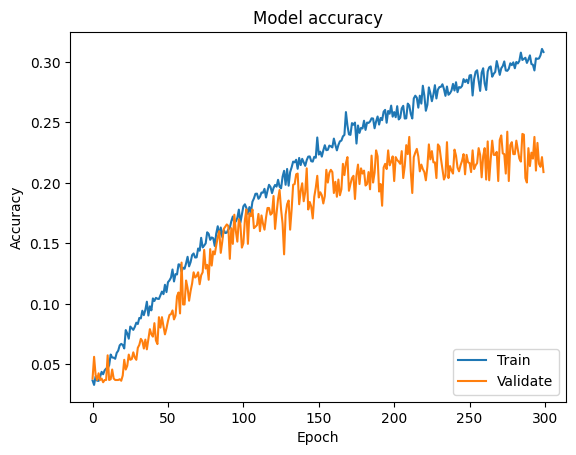


Display the evolution of the loss as a function of the training epoch
  N(Epochs)        =  300
  loss (train)     =  [3.3626418113708496, 3.3272294998168945, 3.3214645385742188, 3.3202826976776123, 3.31939697265625, 3.3140385150909424, 3.3109161853790283, 3.3044629096984863, 3.3017358779907227, 3.2993507385253906, 3.2967514991760254, 3.2945730686187744, 3.2635436058044434, 3.255159378051758, 3.2400567531585693, 3.244607925415039, 3.236881971359253, 3.223520040512085, 3.2223827838897705, 3.212312698364258, 3.2052085399627686, 3.2314653396606445, 3.203136682510376, 3.2020466327667236, 3.1869916915893555, 3.188298225402832, 3.187786817550659, 3.1798300743103027, 3.1608238220214844, 3.1667468547821045, 3.161911725997925, 3.1466121673583984, 3.1486752033233643, 3.1484594345092773, 3.1341094970703125, 3.12723708152771, 3.1138978004455566, 3.1316652297973633, 3.10585618019104, 3.1185479164123535, 3.0970001220703125, 3.110704183578491, 3.0887606143951416, 3.073918581008911, 3.087378263473510

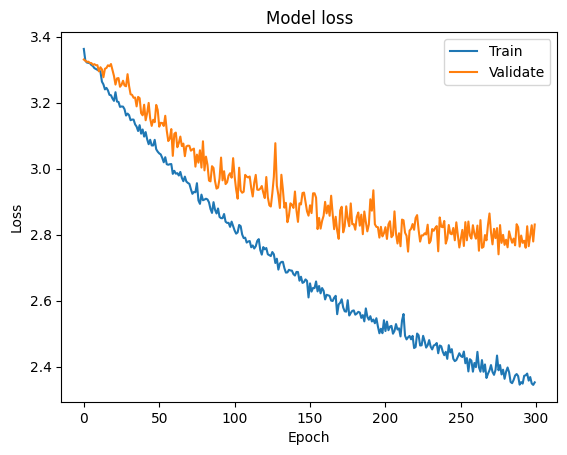


Performance summary (on test data):
7/7 - 7s - loss: 3.1282 - accuracy: 0.1368 - 7s/epoch - 1s/step
	loss = 3.128
	accuracy = 0.137


In [34]:
print("history keys = ", history.history.keys())

print("\n\033[1mDisplay the evolution of the accuracy as a function of the training epoch\033[0m")
print("  N(Epochs)        = ", Nepochs)

print("  accuracy (train) = ", history.history['accuracy'])
print("  accuracy (test)  = ", history.history['val_accuracy'])
plt.plot(history.history['accuracy']) # 'accuracy'
plt.plot(history.history['val_accuracy']) # 'val_accuracy'
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc = 'lower right')
plt.show()
plt.clf()

print("\n\033[1mDisplay the evolution of the loss as a function of the training epoch\033[0m")
print("  N(Epochs)        = ", Nepochs)
print("  loss (train)     = ", history.history['loss'])
print("  loss (test)      = ", history.history['val_loss'])

plt.plot(history.history['loss']) # 'loss'
plt.plot(history.history['val_loss']) # 'val_loss'
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc = 'upper right')
plt.show()

print("\n\033[1mPerformance summary (on test data):\033[0m")
loss, acc = model.evaluate(test_ds, verbose = 2)
print("\tloss = {:5.3f}\n\taccuracy = {:5.3f}".format(loss, acc))

In [35]:
test_true_labels = []
test_ds_list = []

for i in range(len(test_ds)):
    test_true_labels.append((test_ds[i][1]))
    test_ds_list.append((test_ds[i][0]))
    
test_true_labels = np.concatenate(test_true_labels)

test_ds_list = np.concatenate(test_ds_list)
print(len(test_true_labels))

2040


In [36]:
predict_ds = model.predict(test_ds)

7/7 [==============================] - 7s 889ms/step


In [64]:
test_ds_list = np.concatenate([test_ds[batch][0] for batch in range(len(test_ds))])

test_true_label = np.concatenate([test_ds[batch][1] for batch in range(len(test_ds))])

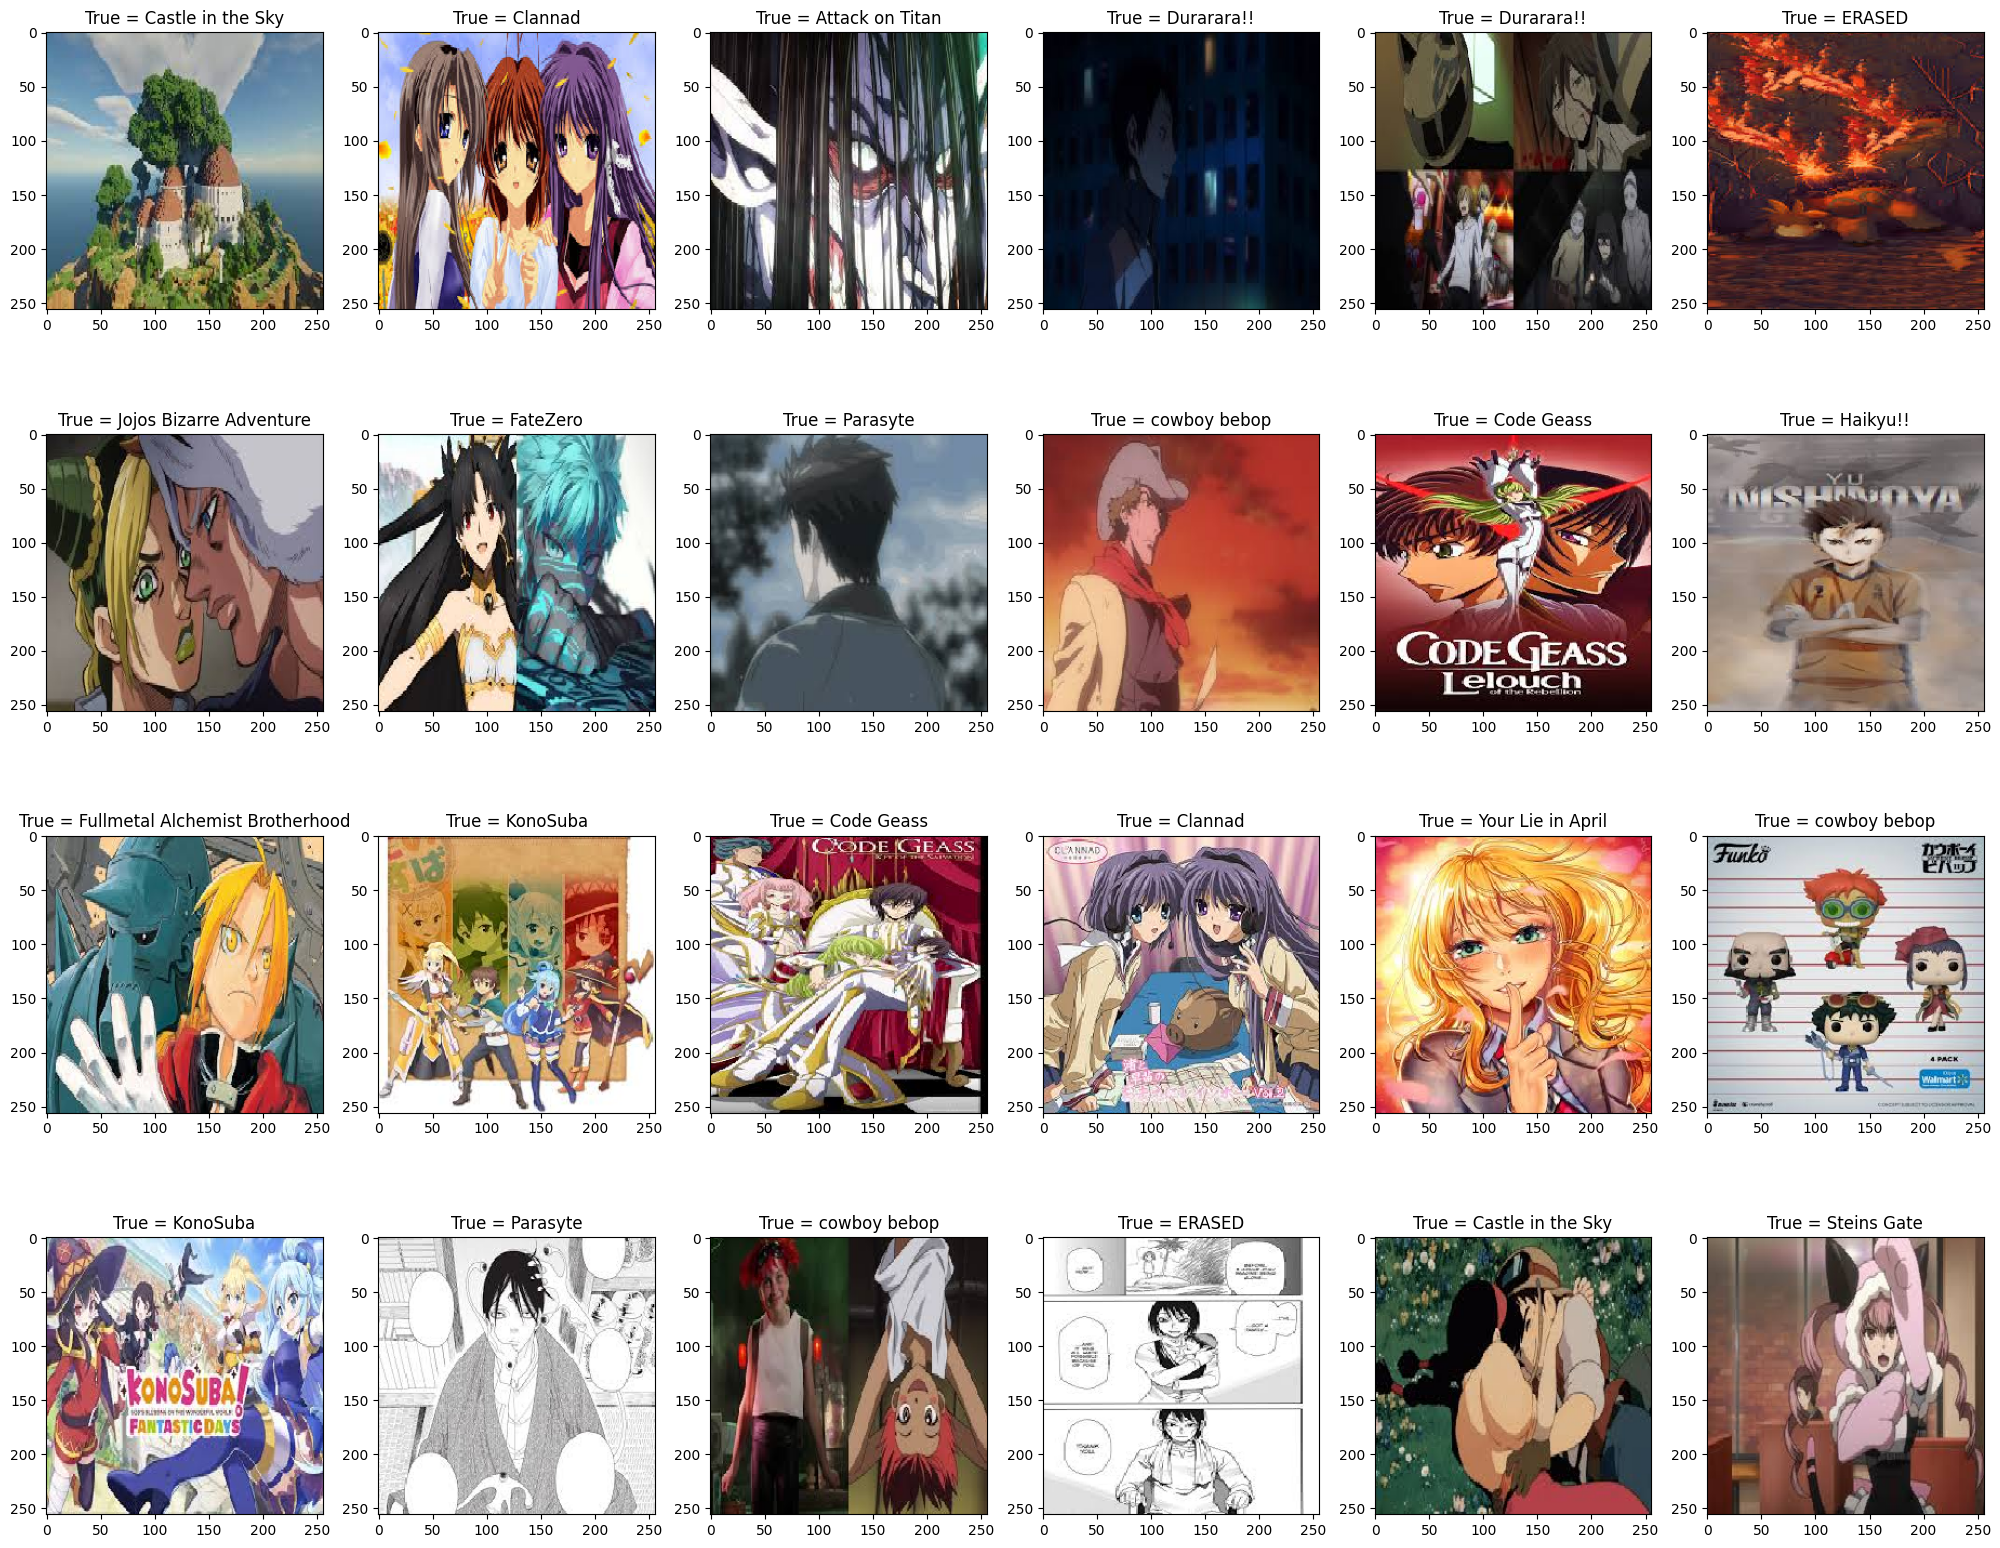

In [38]:
plt.figure(figsize = (25, 20))

j = 1
for i in train_ds:
    if j == 25:
        break
    
    true_class = np.argmax(i[1])
    plt.subplot(4, 6, j, title = "True = " + str(classes_list[true_class]))
    plt.imshow(i[0][0])
    j = j + 1

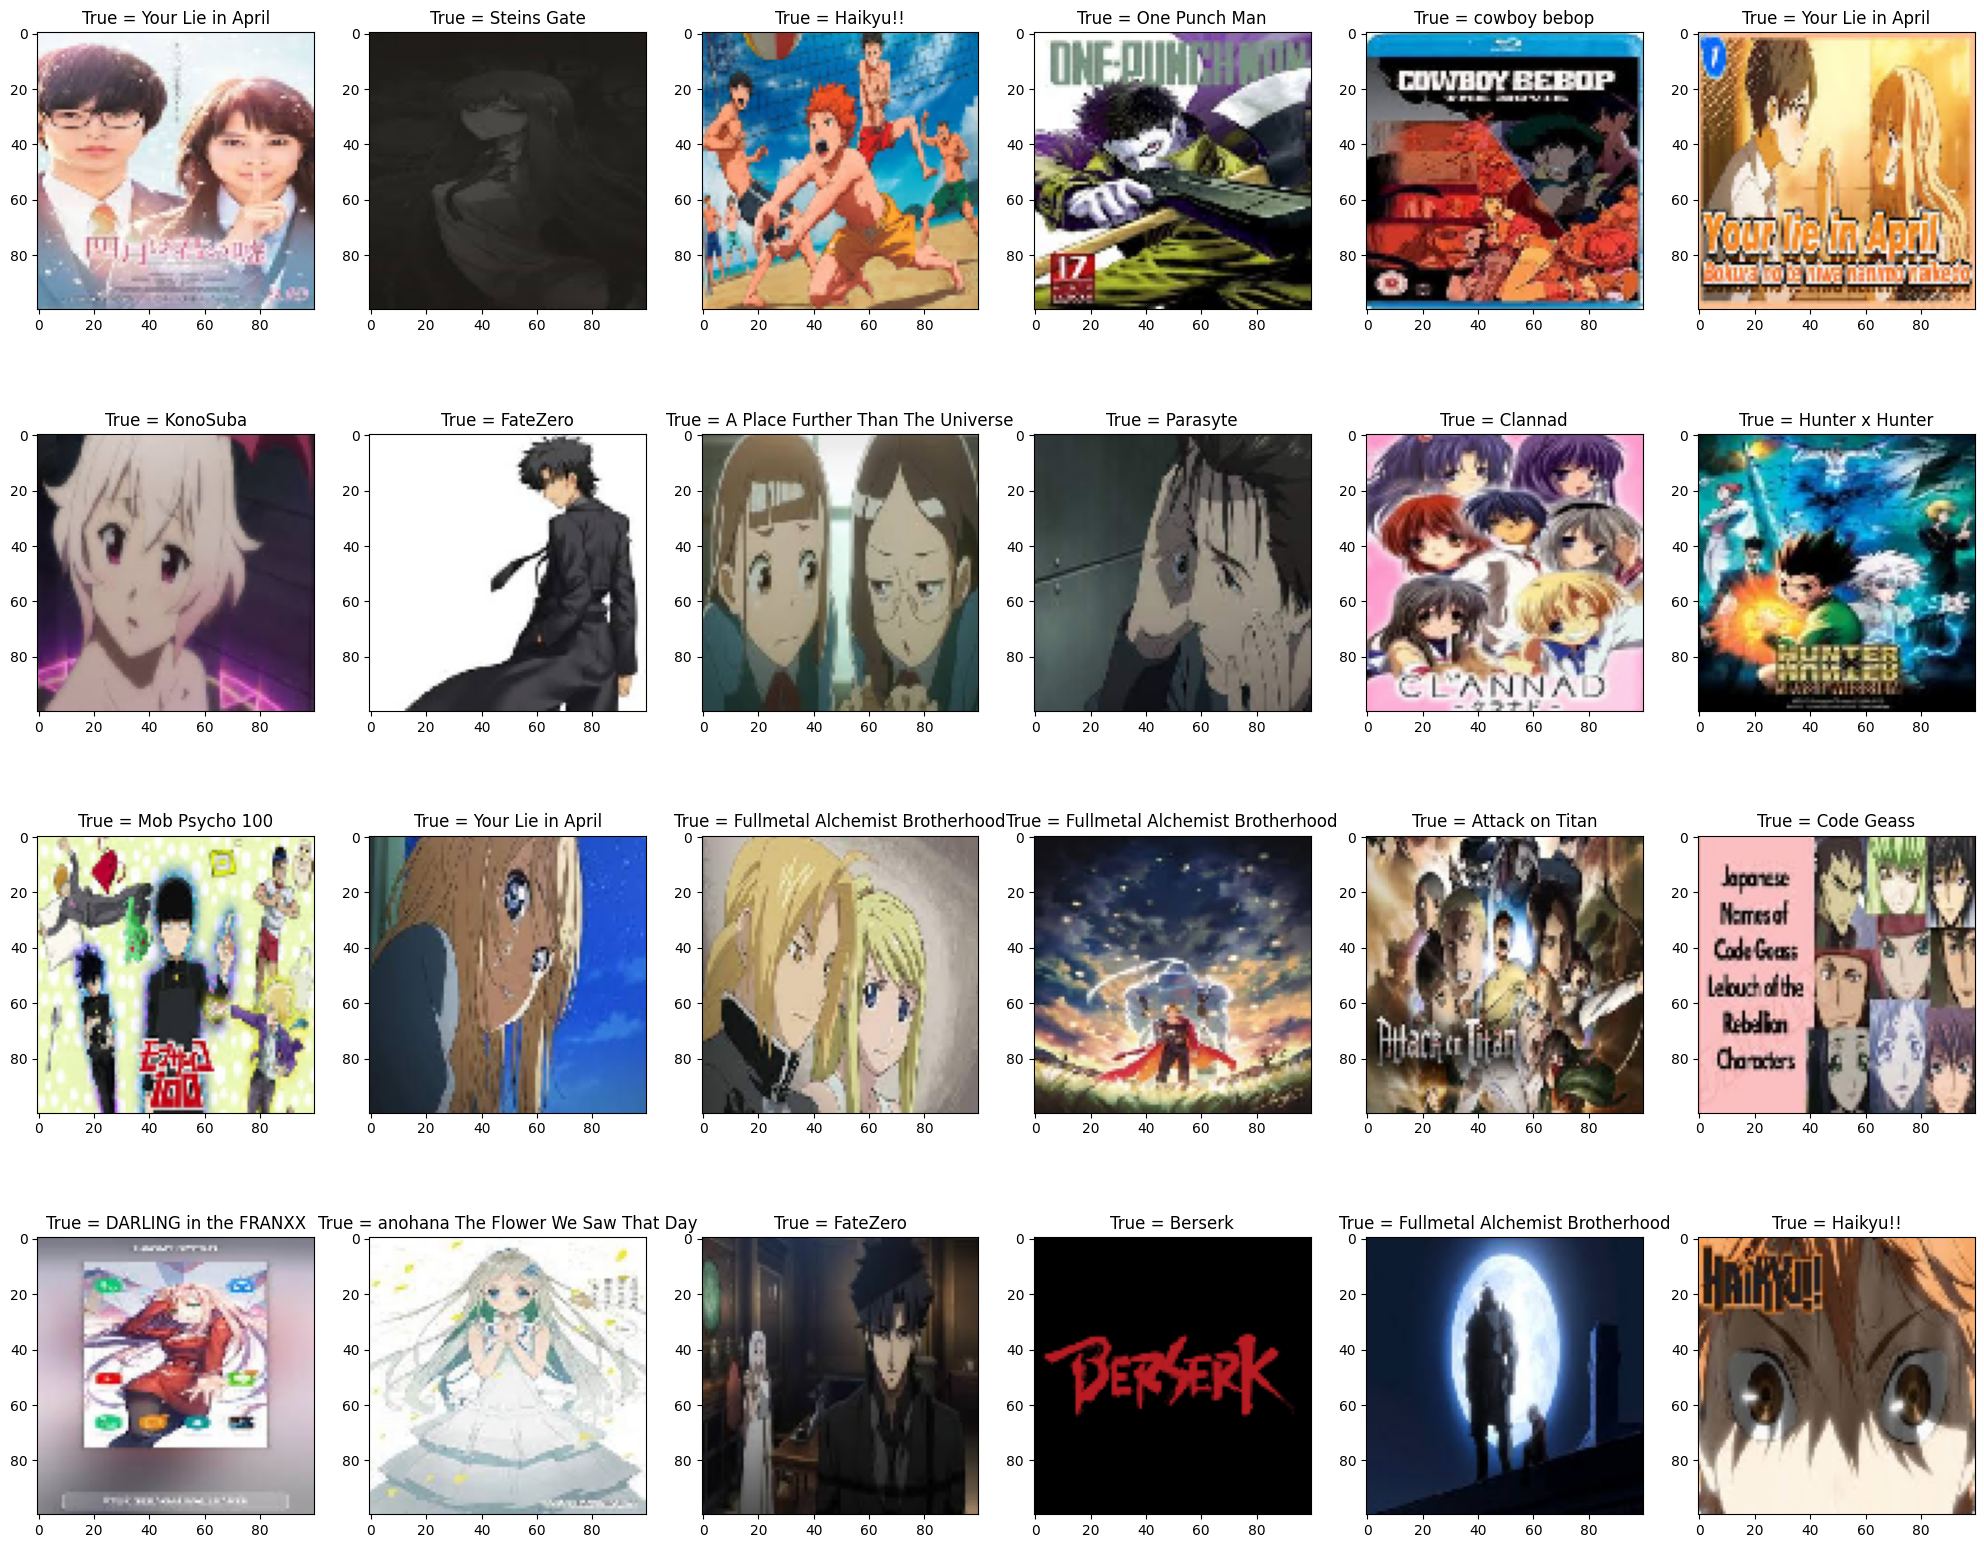

In [59]:
plt.figure(figsize = (25, 20))

j = 1
for i in train_ds:
    if j == 25:
        break
    
    true_class = np.argmax(i[1])
    plt.subplot(4, 6, j, title = "True = " + str(classes_list[true_class]))
    im = tf.image.resize(i[0][0], (100, 100))
    plt.imshow(im)
    j = j + 1

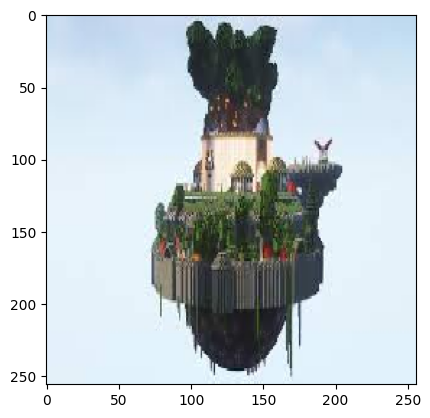

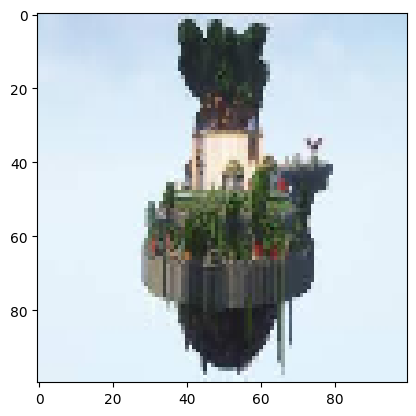

In [57]:
im = train_ds[0][0][1]
im_rs = tf.image.resize(im, (100, 100))
plt.figure()

plt.imshow(im)
plt.figure()
plt.imshow(im_rs)
plt.show()

In [39]:
plt.figure(figsize = (30, 22))

j = 1
for i, image in enumerate(test_ds_list):
    if j == 25:
        break
        
    pred_class, true_class = classes_list[np.argmax(predict_ds_list[i])] , classes_list[np.argmax(test_true_labels[i])]
        
    #pred_class, true_class = np.argmax(predict_ds[i]), np.argmax(test_true_labels[i])
    #print(pred_class, true_class, "Predicted = " + str(class_names[pred_class]), "True = " + str(class_names[true_class]))
     
    plt.subplot(4, 6, j, title = "Predicted = " + pred_class + ",\nTrue = " + true_class)
    plt.imshow(image)
    j = j + 1

In [40]:
classes_dict = {'anohana The Flower We Saw That Day': [0,0],
                'A Place Further Than The Universe': [0,0],
                'Assassination Classroom': [0,0],
                'Attack on Titan': [0,0],
                'Berserk': [0,0],
                'Castle in the Sky': [0,0],
                'Clannad': [0,0],
                'Code Geass': [0,0],
                'cowboy bebop': [0,0],
                'DARLING in the FRANXX': [0,0],
                'Death note': [0,0],
                'Durarara!!': [0,0],
                'ERASED': [0,0],
                'FateZero': [0,0],
                'Fullmetal Alchemist Brotherhood': [0,0],
                'Gintama': [0,0],
                'Haikyu!!': [0,0],
                'Hunter x Hunter': [0,0],
                'Jojos Bizarre Adventure': [0,0],
                'KonoSuba': [0,0],
                'Kurokos Basketball': [0,0],
                'Mobile Suit Gundam': [0,0],
                'Mob Psycho 100': [0,0],
                'My Neighbor Totoro': [0,0],
                'One Punch Man': [0,0],
                'Parasyte': [0,0],
                'Steins Gate': [0,0],
                'Your Lie in April': [0,0]
               }

correct_pred = []
incorrect_pred = []

j = 0
for i in range(len(predict_ds)):
    pred, true = np.argmax(predict_ds[i]), np.argmax(test_true_labels[i])
    
    if pred == true:
        #print("Match: ", np.argmax(test_true_labels[i]), np.argmax(predict_ds[i]))
        correct_pred.append(pred)
        classes_dict.update({ classes_list[true] : [classes_dict[str(classes_list[true])][0] + 1, classes_dict[str(classes_list[true])][1]] })
        #print(np.argmax(predict_ds[i]), np.argmax(test_true_labels[i]))
        #plt.imshow(test_ds[i])
    
    else:
        #print("Not a match: ", np.argmax(test_true_labels[i]), np.argmax(predict_ds[i]))
        incorrect_pred.append(np.argmax(predict_ds[i]))
        classes_dict.update({ classes_list[true] : [classes_dict[str(classes_list[true])][0], classes_dict[str(classes_list[true])][1] + 1] })
    
    #if i == np.argmax(predict_ds[i]):
        #plt.imshow(test_ds[i])
        #print(np.argmax(predict_ds[i]))
    #print(i, j)  
    j = j + 1

In [41]:
print(classes_dict)

{'anohana The Flower We Saw That Day': [4, 71], 'A Place Further Than The Universe': [10, 63], 'Assassination Classroom': [9, 66], 'Attack on Titan': [54, 22], 'Berserk': [28, 48], 'Castle in the Sky': [12, 64], 'Clannad': [2, 74], 'Code Geass': [5, 70], 'cowboy bebop': [13, 63], 'DARLING in the FRANXX': [17, 59], 'Death note': [0, 0], 'Durarara!!': [11, 65], 'ERASED': [7, 69], 'FateZero': [4, 72], 'Fullmetal Alchemist Brotherhood': [3, 72], 'Gintama': [1, 74], 'Haikyu!!': [6, 69], 'Hunter x Hunter': [4, 71], 'Jojos Bizarre Adventure': [7, 69], 'KonoSuba': [13, 63], 'Kurokos Basketball': [2, 74], 'Mobile Suit Gundam': [9, 67], 'Mob Psycho 100': [15, 61], 'My Neighbor Totoro': [19, 57], 'One Punch Man': [1, 73], 'Parasyte': [5, 71], 'Steins Gate': [13, 63], 'Your Lie in April': [5, 71]}


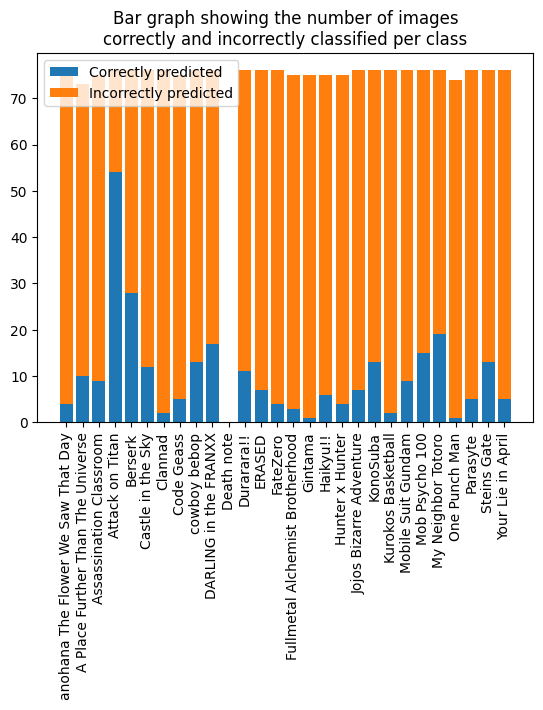

In [42]:
tick_values = np.arange(28)

correct_preds = [i[0] for i in classes_dict.values()]
incorrect_preds = [i[1] for i in classes_dict.values()]

plt.bar(tick_values, correct_preds, label = 'Correctly predicted')
plt.bar(tick_values, incorrect_preds, bottom = correct_preds, label = 'Incorrectly predicted')
plt.xticks(ticks = tick_values, labels = classes_list, rotation = 'vertical')
plt.title('Bar graph showing the number of images\ncorrectly and incorrectly classified per class')
plt.legend()

In [43]:
class_accuracies = []

correct_preds_norm = []
incorrect_preds_norm = []

for label in classes_dict:
    try:
        class_accuracies.append(round(100 * classes_dict[label][0] / (classes_dict[label][0] + classes_dict[label][1]), 3)) 
        
        correct_pred = round(100 * classes_dict[label][0] / (classes_dict[label][0] + classes_dict[label][1]), 0)
        correct_pred_int = int(correct_pred)
        
        incorrect_pred = round(100 * classes_dict[label][1] / (classes_dict[label][0] + classes_dict[label][1]), 0)
        incorrect_pred_int = int(incorrect_pred)
    
        correct_preds_norm.append(correct_pred_int)
        incorrect_preds_norm.append(incorrect_pred_int)
        
    except:
        class_accuracies.append(0)
        correct_preds_norm.append(0)
        incorrect_preds_norm.append(0)

In [44]:
print(class_accuracies)
print(correct_preds_norm)
print(incorrect_preds_norm)

[5.333, 13.699, 12.0, 71.053, 36.842, 15.789, 2.632, 6.667, 17.105, 22.368, 0, 14.474, 9.211, 5.263, 4.0, 1.333, 8.0, 5.333, 9.211, 17.105, 2.632, 11.842, 19.737, 25.0, 1.351, 6.579, 17.105, 6.579]
[5, 14, 12, 71, 37, 16, 3, 7, 17, 22, 0, 14, 9, 5, 4, 1, 8, 5, 9, 17, 3, 12, 20, 25, 1, 7, 17, 7]
[95, 86, 88, 29, 63, 84, 97, 93, 83, 78, 0, 86, 91, 95, 96, 99, 92, 95, 91, 83, 97, 88, 80, 75, 99, 93, 83, 93]


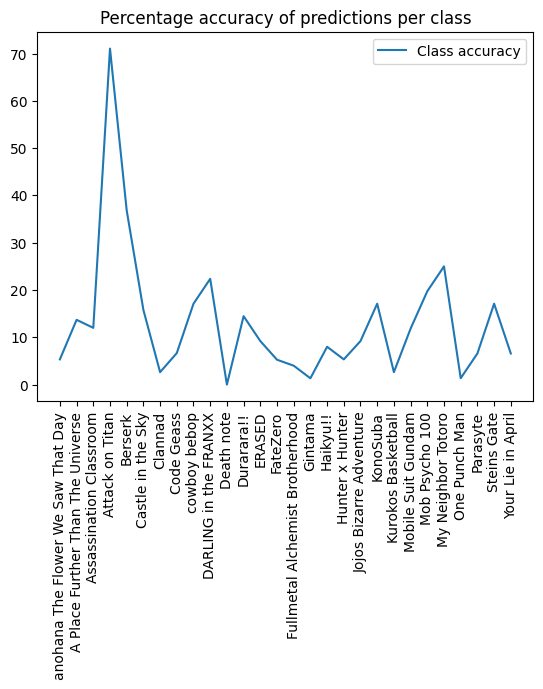

In [45]:
plt.plot(tick_values, class_accuracies, label = 'Class accuracy')
plt.xticks(ticks = tick_values, labels = classes_list, rotation = 'vertical')
plt.title('Percentage accuracy of predictions per class')
plt.legend()

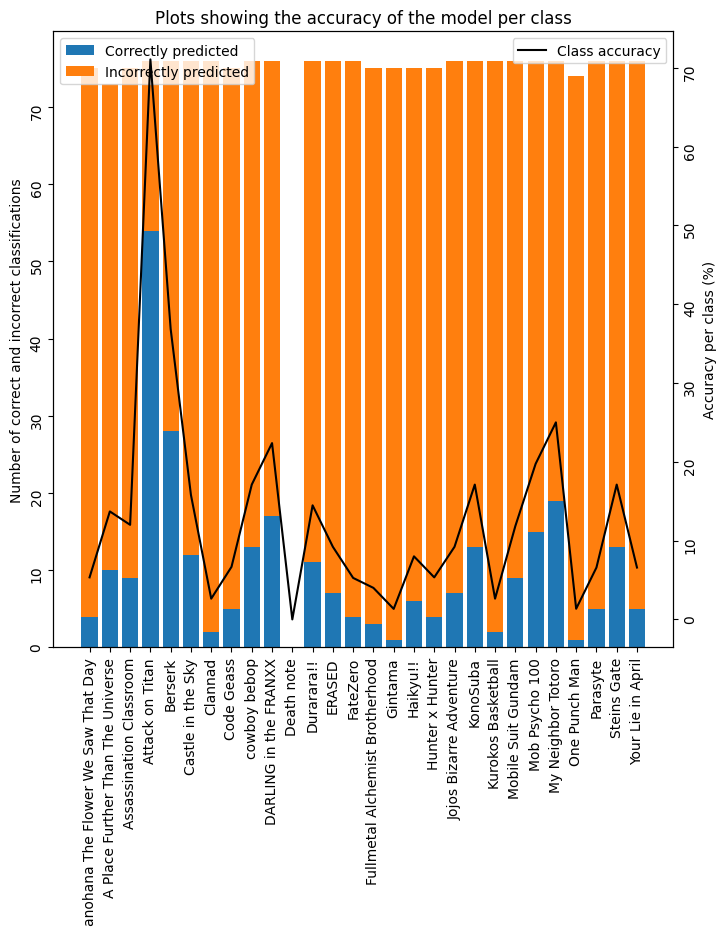

In [46]:
COLOR_TEMPERATURE = "#69b3a2"
COLOR_PRICE = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.bar(tick_values, correct_preds, label = 'Correctly predicted')
ax1.bar(tick_values, incorrect_preds, bottom = correct_preds, label = 'Incorrectly predicted')

ax2.plot(tick_values, class_accuracies, label = 'Class accuracy', color = 'k')

# ax1.bar(date, temperature, color=COLOR_TEMPERATURE, edgecolor="black", alpha=0.4, width=1.0)
# ax2.plot(date, price, color=COLOR_PRICE, lw=4)

ax1.set_ylabel("Number of correct and incorrect classifications")

# ax1.set_ylabel("Temperature (Celsius °)", color=COLOR_TEMPERATURE, fontsize=14)
# ax1.tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)

ax2.set_ylabel("Accuracy per class (%)")

# ax2.set_ylabel("Price ($)", color=COLOR_PRICE, fontsize=14)
# ax2.tick_params(axis="y", labelcolor=COLOR_PRICE)

# Add values inside bars

plt.xticks(ticks = tick_values, labels = classes_list, rotation = 90)
ax1.tick_params(labelrotation=90)
ax2.tick_params(labelrotation=90)

# fig.autofmt_xdate(rotation = 90)
plt.title("Plots showing the accuracy of the model per class")

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

plt.show()

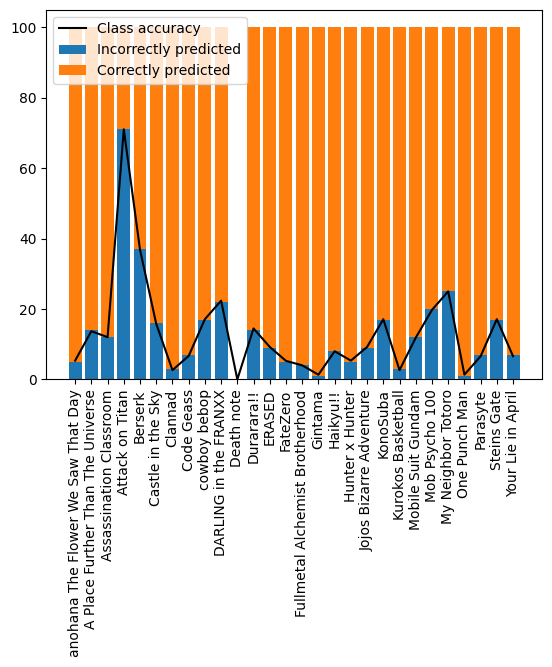

In [47]:
plt.plot(tick_values, class_accuracies, label = 'Class accuracy', color = 'k', zorder = 2)
plt.bar(tick_values, correct_preds_norm, label = 'Incorrectly predicted', zorder = 1)
plt.bar(tick_values, incorrect_preds_norm, bottom = correct_preds_norm, label = 'Correctly predicted', zorder = 1)
plt.xticks(ticks = tick_values, labels = classes_list, rotation = 'vertical')
plt.legend(loc = 'upper left')

In [49]:
test_ds_list = np.concatenate([test_ds[batch][0] for batch in range(len(test_ds))])
test_true_label = np.concatenate([test_ds[batch][1] for batch in range(len(test_ds))])

64/64 [==============================] - 3s 45ms/step


([<matplotlib.axis.YTick at 0x7fbcbf3a03a0>,
 [Text(0, 0, 'anohana The Flower We Saw That Day'),
  Text(0, 1, 'A Place Further Than The Universe'),
  Text(0, 2, 'Assassination Classroom'),
  Text(0, 3, 'Attack on Titan'),
  Text(0, 4, 'Berserk'),
  Text(0, 5, 'Castle in the Sky'),
  Text(0, 6, 'Clannad'),
  Text(0, 7, 'Code Geass'),
  Text(0, 8, 'cowboy bebop'),
  Text(0, 9, 'DARLING in the FRANXX'),
  Text(0, 10, 'Death note'),
  Text(0, 11, 'Durarara!!'),
  Text(0, 12, 'ERASED'),
  Text(0, 13, 'FateZero'),
  Text(0, 14, 'Fullmetal Alchemist Brotherhood'),
  Text(0, 15, 'Gintama'),
  Text(0, 16, 'Haikyu!!'),
  Text(0, 17, 'Hunter x Hunter'),
  Text(0, 18, 'Jojos Bizarre Adventure'),
  Text(0, 19, 'KonoSuba'),
  Text(0, 20, 'Kurokos Basketball'),
  Text(0, 21, 'Mobile Suit Gundam'),
  Text(0, 22, 'Mob Psycho 100'),
  Text(0, 23, 'My Neighbor Totoro'),
  Text(0, 24, 'One Punch Man'),
  Text(0, 25, 'Parasyte'),
  Text(0, 26, 'Steins Gate'),
  Text(0, 27, 'Your Lie in April')])

<Figure size 4000x4000 with 0 Axes>

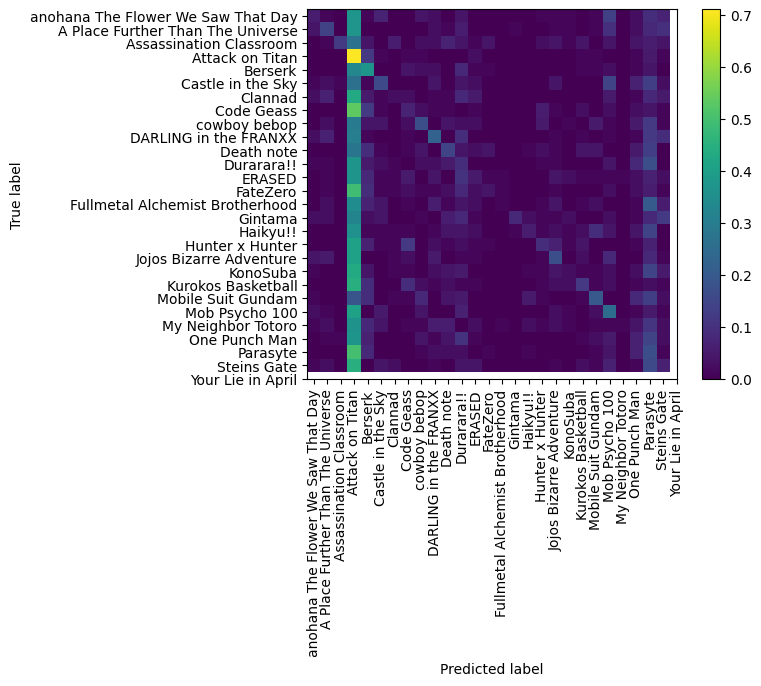

In [50]:
plt.figure(figsize = (40, 40))

predict_ds_list = model.predict(test_ds_list)
preds = []
for i in range(len(predict_ds_list)):
    preds.append(np.argmax(predict_ds_list[i]))
    
true_labels = []    
for i in range(len(test_true_label)):
    true_labels.append(np.argmax(test_true_label[i]))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix = confusion_matrix(true_labels, preds, normalize = 'true')

display = ConfusionMatrixDisplay(confusion_matrix = matrix)
display.plot(include_values = True)
plt.xticks(np.arange(28), classes_list, rotation = 'vertical')
plt.yticks(np.arange(28), classes_list)

fig = disp.figure()
fig.set_figwidth(20)
fig.set_figheight(20)